In [35]:
import torch

from model.attention_unet import A_UNET
from model.baseline_unet import UNet
from model.dilated_unet import DilatedUNet
from model.resnet_unet import ResNetUNet
from model.baseline_lightning import LightningSegmentation

import numpy as np

In [12]:
from torchsummary import summary
unet = UNet().cuda()
# unet = DilatedUNet().cuda()
summary(unet, (1, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 512, 512]             640
       BatchNorm2d-2         [-1, 64, 512, 512]             128
              ReLU-3         [-1, 64, 512, 512]               0
            Conv2d-4         [-1, 64, 512, 512]          36,928
       BatchNorm2d-5         [-1, 64, 512, 512]             128
              ReLU-6         [-1, 64, 512, 512]               0
        DoubleConv-7         [-1, 64, 512, 512]               0
         MaxPool2d-8         [-1, 64, 256, 256]               0
      EncoderBlock-9  [[-1, 64, 512, 512], [-1, 64, 256, 256]]               0
           Conv2d-10        [-1, 128, 256, 256]          73,856
      BatchNorm2d-11        [-1, 128, 256, 256]             256
             ReLU-12        [-1, 128, 256, 256]               0
           Conv2d-13        [-1, 128, 256, 256]         147,584
      BatchNorm2d-14    

In [13]:
# unet = UNet().cuda()
unet = DilatedUNet().cuda()
summary(unet, (1, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 44, 512, 512]             440
              ReLU-2         [-1, 44, 512, 512]               0
              ReLU-3         [-1, 44, 512, 512]               0
              ReLU-4         [-1, 44, 512, 512]               0
              ReLU-5         [-1, 44, 512, 512]               0
              ReLU-6         [-1, 44, 512, 512]               0
              ReLU-7         [-1, 44, 512, 512]               0
              ReLU-8         [-1, 44, 512, 512]               0
              ReLU-9         [-1, 44, 512, 512]               0
             ReLU-10         [-1, 44, 512, 512]               0
             ReLU-11         [-1, 44, 512, 512]               0
             ReLU-12         [-1, 44, 512, 512]               0
             ReLU-13         [-1, 44, 512, 512]               0
             ReLU-14         [-1, 44, 5

In [15]:
# unet = UNet().cuda()
# unet = DilatedUNet().cuda()
unet = ResNetUNet(1).cuda()
summary(unet, (1, 512, 512))

getting done


/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 512, 512]           1,792
       BatchNorm2d-2         [-1, 64, 512, 512]             128
              ReLU-3         [-1, 64, 512, 512]               0
            Conv2d-4         [-1, 64, 512, 512]          36,928
       BatchNorm2d-5         [-1, 64, 512, 512]             128
              ReLU-6         [-1, 64, 512, 512]               0
            Conv2d-7         [-1, 64, 256, 256]           9,408
            Conv2d-8         [-1, 64, 256, 256]           9,408
       BatchNorm2d-9         [-1, 64, 256, 256]             128
      BatchNorm2d-10         [-1, 64, 256, 256]             128
             ReLU-11         [-1, 64, 256, 256]               0
             ReLU-12         [-1, 64, 256, 256]               0
        MaxPool2d-13         [-1, 64, 128, 128]               0
        MaxPool2d-14         [-1, 64, 1

In [17]:
# unet = UNet().cuda()
# unet = DilatedUNet().cuda()
unet = A_UNET().cuda()
summary(unet, (1, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 512, 512]             640
       BatchNorm2d-2         [-1, 64, 512, 512]             128
              ReLU-3         [-1, 64, 512, 512]               0
            Conv2d-4         [-1, 64, 512, 512]          36,928
       BatchNorm2d-5         [-1, 64, 512, 512]             128
              ReLU-6         [-1, 64, 512, 512]               0
        DoubleConv-7         [-1, 64, 512, 512]               0
         MaxPool2d-8         [-1, 64, 256, 256]               0
      EncoderBlock-9  [[-1, 64, 512, 512], [-1, 64, 256, 256]]               0
           Conv2d-10        [-1, 128, 256, 256]          73,856
      BatchNorm2d-11        [-1, 128, 256, 256]             256
             ReLU-12        [-1, 128, 256, 256]               0
           Conv2d-13        [-1, 128, 256, 256]         147,584
      BatchNorm2d-14    

In [50]:
epochs = range(100)
# Generate the array
arr = np.linspace(0, 1, 50)
arr = np.append(arr, np.random.uniform(0, 0.58, size=25))
arr = np.append(arr, np.random.uniform(0, 0.58, size=25))

# Shuffle the array
np.random.shuffle(arr)

# Round the values to 3 decimal places
arr = np.sort(np.round(arr, 3))

print(arr)

[0.    0.02  0.038 0.041 0.048 0.055 0.055 0.061 0.082 0.102 0.107 0.121
 0.122 0.13  0.143 0.163 0.163 0.165 0.167 0.167 0.175 0.184 0.204 0.224
 0.225 0.228 0.245 0.246 0.252 0.26  0.265 0.267 0.268 0.272 0.273 0.283
 0.286 0.297 0.306 0.315 0.318 0.32  0.327 0.338 0.347 0.353 0.367 0.381
 0.388 0.392 0.392 0.394 0.408 0.426 0.429 0.438 0.44  0.444 0.449 0.469
 0.49  0.49  0.491 0.493 0.496 0.51  0.512 0.515 0.531 0.531 0.536 0.551
 0.554 0.558 0.566 0.566 0.571 0.575 0.578 0.592 0.612 0.633 0.653 0.673
 0.694 0.714 0.735 0.755 0.776 0.796 0.816 0.837 0.857 0.878 0.898 0.918
 0.939 0.959 0.98  1.   ]


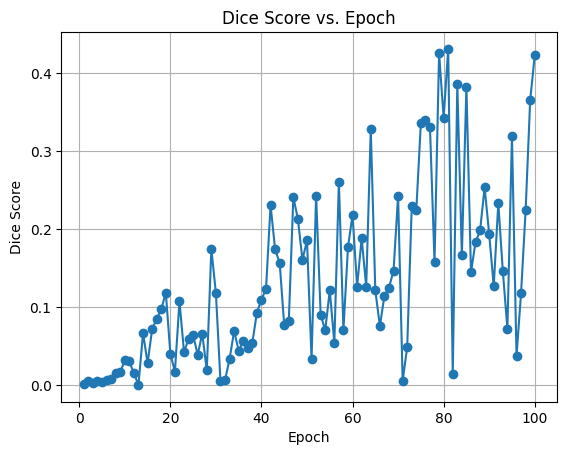

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv("main_train.csv")

# print(data["Unet"])

# Extract epoch and dice score values
epochs = data["Epoch"]
val = data["Unet"]

# Plot the data
plt.plot(epochs, val, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.title('Dice Score vs. Epoch')
plt.grid(True)

# Display the plot
plt.show()
